In [1]:
import numpy as np
import pandas as pd


print('loading prior')
priors = pd.read_csv('order_products__prior.csv', dtype={
            'order_id': np.int32,
            'product_id': np.uint16,
            'add_to_cart_order': np.int16,
            'reordered': np.int8})

print('loading train')
train = pd.read_csv('order_products__train.csv', dtype={
            'order_id': np.int32,
            'product_id': np.uint16,
            'add_to_cart_order': np.int16,
            'reordered': np.int8})

print('loading orders')
orders = pd.read_csv('orders.csv', dtype={
        'order_id': np.int32,
        'user_id': np.int32,
        'eval_set': 'category',
        'order_number': np.int16,
        'order_dow': np.int8,
        'order_hour_of_day': np.int8,
        'days_since_prior_order': np.float32})

print('loading products')
products = pd.read_csv('products.csv', dtype={
        'product_id': np.uint16,
        'order_id': np.int32,
        'aisle_id': np.uint8,
        'department_id': np.uint8},
        usecols=['product_id', 'aisle_id', 'department_id'])

print('priors {}: {}'.format(priors.shape, ', '.join(priors.columns)))
print('orders {}: {}'.format(orders.shape, ', '.join(orders.columns)))
print('train {}: {}'.format(train.shape, ', '.join(train.columns)))

loading prior
loading train
loading orders
loading products
priors (32434489, 4): order_id, product_id, add_to_cart_order, reordered
orders (3421083, 7): order_id, user_id, eval_set, order_number, order_dow, order_hour_of_day, days_since_prior_order
train (1384617, 4): order_id, product_id, add_to_cart_order, reordered


In [2]:
priors.head()

,order_id,product_id,add_to_cart_order,reordered
0,2,33120,1,1
1,2,28985,2,1
2,2,9327,3,0
3,2,45918,4,1
4,2,30035,5,0


In [3]:
orders.head()

,order_id,user_id,eval_set,order_number,order_dow,order_hour_of_day,days_since_prior_order
0,2539329,1,prior,1,2,8,NaN
1,2398795,1,prior,2,3,7,15.0
2,473747,1,prior,3,3,12,21.0
3,2254736,1,prior,4,4,7,29.0
4,431534,1,prior,5,4,15,28.0


In [4]:
train.head()

,order_id,product_id,add_to_cart_order,reordered
0,1,49302,1,1
1,1,11109,2,1
2,1,10246,3,0
3,1,49683,4,0
4,1,43633,5,1


In [5]:
print('computing product f')
prods = pd.DataFrame()
prods['orders'] = priors.groupby(priors.product_id).size().astype(np.int32)
prods['reorders'] = priors['reordered'].groupby(priors.product_id).sum().astype(np.float32)
prods['reorder_rate'] = (prods.reorders / prods.orders).astype(np.float32)# One feature 
products = products.join(prods, on='product_id')
products.set_index('product_id', drop=False, inplace=True)


computing product f


In [6]:
prods

,orders,reorders,reorder_rate
product_id,,,
1,1852,1136.0,0.613391
2,90,12.0,0.133333
3,277,203.0,0.732852
4,329,147.0,0.446809
5,15,9.0,0.600000
6,8,3.0,0.375000
7,30,12.0,0.400000
8,165,83.0,0.503030
9,156,82.0,0.525641


In [7]:
products

,product_id,aisle_id,department_id,orders,reorders,reorder_rate
product_id,,,,,,
1,1,61,19,1852.0,1136.0,0.613391
2,2,104,13,90.0,12.0,0.133333
3,3,94,7,277.0,203.0,0.732852
4,4,38,1,329.0,147.0,0.446809
5,5,5,13,15.0,9.0,0.600000
6,6,11,11,8.0,3.0,0.375000
7,7,98,7,30.0,12.0,0.400000
8,8,116,1,165.0,83.0,0.503030
9,9,120,16,156.0,82.0,0.525641


In [8]:
del prods

In [9]:
products.head()

,product_id,aisle_id,department_id,orders,reorders,reorder_rate
product_id,,,,,,
1,1,61,19,1852.0,1136.0,0.613391
2,2,104,13,90.0,12.0,0.133333
3,3,94,7,277.0,203.0,0.732852
4,4,38,1,329.0,147.0,0.446809
5,5,5,13,15.0,9.0,0.600000


In [10]:
print('add order info to priors')
orders.set_index('order_id', inplace=True, drop=False)
priors = priors.join(orders, on='order_id', rsuffix='_')
priors.drop('order_id_', inplace=True, axis=1)

add order info to priors


In [11]:
priors.head()

,order_id,product_id,add_to_cart_order,reordered,user_id,eval_set,order_number,order_dow,order_hour_of_day,days_since_prior_order
0,2,33120,1,1,202279,prior,3,5,9,8.0
1,2,28985,2,1,202279,prior,3,5,9,8.0
2,2,9327,3,0,202279,prior,3,5,9,8.0
3,2,45918,4,1,202279,prior,3,5,9,8.0
4,2,30035,5,0,202279,prior,3,5,9,8.0


In [12]:
print('computing user f')
usr = pd.DataFrame()
usr['average_days_between_orders'] = orders.groupby('user_id')['days_since_prior_order'].mean().astype(np.float32)
usr['nb_orders'] = orders.groupby('user_id').size().astype(np.int16)

users = pd.DataFrame()
users['total_items'] = priors.groupby('user_id').size().astype(np.int16)
users['all_products'] = priors.groupby('user_id')['product_id'].apply(set)
users['total_distinct_items'] = (users.all_products.map(len)).astype(np.int16)

users = users.join(usr)
del usr
users['average_basket'] = (users.total_items / users.nb_orders).astype(np.float32)
print('user f', users.shape)

computing user f
user f (206209, 6)


In [13]:
users.head()

,total_items,all_products,total_distinct_items,average_days_between_orders,nb_orders,average_basket
user_id,,,,,,
1,59,"{17122, 196, 26405, 46149, 14084, 13032, 26088...",18,19.000000,11,5.363636
2,195,"{45066, 2573, 18961, 23, 32792, 1559, 22559, 1...",102,16.285715,15,13.000000
3,88,"{17668, 44683, 48523, 21903, 14992, 21137, 324...",33,12.000000,13,6.769231
4,18,"{21573, 42329, 17769, 35469, 37646, 1200, 1905...",17,17.000000,6,3.000000
5,37,"{11777, 40706, 28289, 48775, 20754, 6808, 1398...",23,11.500000,5,7.400000


In [14]:
print('compute userXproduct f - this is long...')
priors['user_product'] = priors.product_id + priors.user_id * 100000

compute userXproduct f - this is long...


In [15]:
priors['user_product']

0          -1246903360
1          -1246907495
2          -1246927153
3          -1246890562
4          -1246906445
5          -1246918686
6          -1246896339
7          -1246934661
8          -1246892812
9           -877802726
10          -877811642
11          -877818776
12          -877814577
13          -877818812
14          -877789813
15          -877819019
16          -877803815
17           672177658
18           672157250
19           672170574
20           672158577
21           672140870
22           672152167
23           672153414
24           672165678
25           672171101
26           672148432
27           672155962
28           672163461
29           672172092
               ...    
32434459     977674654
32434460     977664421
32434461     977645639
32434462     977657826
32434463     977643371
32434464     977670765
32434465   -1177263703
32434466   -1177289670
32434467   -1177269589
32434468   -1177298828
32434469   -1177281349
32434470   -1177266667
32434471   

In [16]:
d= dict()
for row in priors.itertuples():
    z = row.user_product
    if z not in d:
        d[z] = (1,
                (row.order_number, row.order_id),
                row.add_to_cart_order)
    else:
        d[z] = (d[z][0] + 1,
                max(d[z][1], (row.order_number, row.order_id)),
                d[z][2] + row.add_to_cart_order)

print('to dataframe (less memory)')
userXproduct = pd.DataFrame.from_dict(d, orient='index')





to dataframe (less memory)


In [17]:
d

{-1246903360: (5, (8, 104690), 10),
 -1246907495: (5, (6, 132412), 16),
 -1246927153: (1, (3, 2), 3),
 -1246890562: (5, (7, 2382766), 24),
 -1246906445: (3, (7, 2382766), 14),
 -1246918686: (7, (7, 2382766), 25),
 -1246896339: (5, (6, 132412), 29),
 -1246934661: (2, (3, 2), 19),
 -1246892812: (3, (6, 132412), 20),
 -877802726: (17, (25, 368699), 86),
 -877811642: (14, (25, 368699), 58),
 -877818776: (13, (25, 368699), 72),
 -877814577: (14, (25, 368699), 55),
 -877818812: (6, (16, 3), 54),
 -877789813: (13, (25, 368699), 69),
 -877819019: (4, (24, 2214773), 35),
 -877803815: (6, (24, 2214773), 45),
 672177658: (17, (55, 1609396), 99),
 672157250: (4, (42, 2715951), 19),
 672170574: (19, (56, 1253720), 169),
 672158577: (49, (56, 1253720), 401),
 672140870: (29, (56, 1253720), 235),
 672152167: (33, (55, 1609396), 301),
 672153414: (12, (55, 1609396), 119),
 672165678: (16, (54, 385597), 124),
 672171101: (4, (43, 214045), 52),
 672148432: (19, (56, 1253720), 174),
 672155962: (21, (52,

In [18]:
del d


In [19]:
userXproduct.columns = ['nb_orders', 'last_order_id', 'sum_pos_in_cart']
userXproduct.nb_orders = userXproduct.nb_orders.astype(np.int16)
userXproduct.last_order_id = userXproduct.last_order_id.map(lambda x: x[1]).astype(np.int32)
userXproduct.sum_pos_in_cart = userXproduct.sum_pos_in_cart.astype(np.int16)
print('user X product f', len(userXproduct))

user X product f 13293564


In [20]:
userXproduct

,nb_orders,last_order_id,sum_pos_in_cart
-1246903360,5,104690,10
-1246907495,5,132412,16
-1246927153,1,2,3
-1246890562,5,2382766,24
-1246906445,3,2382766,14
-1246918686,7,2382766,25
-1246896339,5,132412,29
-1246934661,2,2,19
-1246892812,3,132412,20
-877802726,17,368699,86


In [21]:
del priors

In [22]:
### train / test orders ###
print('split orders : train, test')
test_orders = orders[orders.eval_set == 'test']
train_orders = orders[orders.eval_set == 'train']

train.set_index(['order_id', 'product_id'], inplace=True, drop=False)

split orders : train, test


In [23]:
train_orders.head()

,order_id,user_id,eval_set,order_number,order_dow,order_hour_of_day,days_since_prior_order
order_id,,,,,,,
1187899,1187899,1,train,11,4,8,14.0
1492625,1492625,2,train,15,1,11,30.0
2196797,2196797,5,train,5,0,11,6.0
525192,525192,7,train,21,2,11,6.0
880375,880375,8,train,4,1,14,10.0


In [24]:
test_orders.head()

,order_id,user_id,eval_set,order_number,order_dow,order_hour_of_day,days_since_prior_order
order_id,,,,,,,
2774568,2774568,3,test,13,5,15,11.0
329954,329954,4,test,6,3,12,30.0
1528013,1528013,6,test,4,3,16,22.0
1376945,1376945,11,test,8,6,11,8.0
1356845,1356845,12,test,6,1,20,30.0


In [25]:
def features(selected_orders, labels_given=False):
    print('build candidate list')
    order_list = []
    product_list = []
    labels = []
    i=0
    for row in selected_orders.itertuples():
        i+=1
        if i%10000 == 0: print('order row',i)
        order_id = row.order_id
        user_id = row.user_id
        user_products = users.all_products[user_id]
        product_list += user_products
        order_list += [order_id] * len(user_products)
        if labels_given:
            labels += [(order_id, product) in train.index for product in user_products]
        
    df = pd.DataFrame({'order_id':order_list, 'product_id':product_list}, dtype=np.int32)
    labels = np.array(labels, dtype=np.int8)
    del order_list
    del product_list
    
    print('user related features')
    df['user_id'] = df.order_id.map(orders.user_id)
    df['user_total_orders'] = df.user_id.map(users.nb_orders)
    df['user_total_items'] = df.user_id.map(users.total_items)
    df['total_distinct_items'] = df.user_id.map(users.total_distinct_items)
    df['user_average_days_between_orders'] = df.user_id.map(users.average_days_between_orders)
    df['user_average_basket'] =  df.user_id.map(users.average_basket)
    
    print('order related features')
    df['dow'] = df.order_id.map(orders.order_dow)
    df['order_hour_of_day'] = df.order_id.map(orders.order_hour_of_day)
    df['days_since_prior_order'] = df.order_id.map(orders.days_since_prior_order)
    df['days_since_ratio'] = df.days_since_prior_order / df.user_average_days_between_orders
    
    print('product related features')
    df['aisle_id'] = df.product_id.map(products.aisle_id)
    df['department_id'] = df.product_id.map(products.department_id)
    df['product_orders'] = df.product_id.map(products.orders).astype(np.int32)
    df['product_reorders'] = df.product_id.map(products.reorders)
    df['product_reorder_rate'] = df.product_id.map(products.reorder_rate)

    print('user_X_product related features')
    df['z'] = df.user_id * 100000 + df.product_id
    df.drop(['user_id'], axis=1, inplace=True)
    df['UP_orders'] = df.z.map(userXproduct.nb_orders)
    df['UP_orders_ratio'] = (df.UP_orders / df.user_total_orders).astype(np.float32)
    df['UP_last_order_id'] = df.z.map(userXproduct.last_order_id)
    df['UP_average_pos_in_cart'] = (df.z.map(userXproduct.sum_pos_in_cart) / df.UP_orders).astype(np.float32)
    df['UP_reorder_rate'] = (df.UP_orders / df.user_total_orders).astype(np.float32)
    df['UP_orders_since_last'] = df.user_total_orders - df.UP_last_order_id.map(orders.order_number)
    df['UP_delta_hour_vs_last'] = abs(df.order_hour_of_day - df.UP_last_order_id.map(orders.order_hour_of_day)).map(lambda x: min(x, 24-x)).astype(np.int8)
    df['UP_same_dow_as_last_order'] = df.UP_last_order_id.map(orders.order_dow) == \
                                                  df.order_id.map(orders.order_dow)

    df.drop(['UP_last_order_id', 'z'], axis=1, inplace=True)
    print(df.dtypes)
    print(df.memory_usage())
    return (df, labels)

In [26]:
df_train, labels = features(train_orders, labels_given=True)

build candidate list
order row 10000
order row 20000
order row 30000
order row 40000
order row 50000
order row 60000
order row 70000
order row 80000
order row 90000
order row 100000
order row 110000
order row 120000
order row 130000
user related features
order related features
product related features
user_X_product related features
order_id                              int32
product_id                            int32
user_total_orders                     int16
user_total_items                      int16
total_distinct_items                  int16
user_average_days_between_orders    float32
user_average_basket                 float32
dow                                    int8
order_hour_of_day                      int8
days_since_prior_order              float32
days_since_ratio                    float32
aisle_id                              uint8
department_id                         uint8
product_orders                        int32
product_reorders                    float32
produ

In [27]:
df_train

,order_id,product_id,user_total_orders,user_total_items,total_distinct_items,user_average_days_between_orders,user_average_basket,dow,order_hour_of_day,days_since_prior_order,...,product_orders,product_reorders,product_reorder_rate,UP_orders,UP_orders_ratio,UP_average_pos_in_cart,UP_reorder_rate,UP_orders_since_last,UP_delta_hour_vs_last,UP_same_dow_as_last_order
0,1187899,17122,11,59,18,19.000000,5.363636,4,8,14.0,...,13880,9377.0,0.675576,1,0.090909,6.000000,0.090909,6,7,True
1,1187899,196,11,59,18,19.000000,5.363636,4,8,14.0,...,35791,27791.0,0.776480,10,0.909091,1.400000,0.909091,1,0,True
2,1187899,26405,11,59,18,19.000000,5.363636,4,8,14.0,...,1214,536.0,0.441516,2,0.181818,5.000000,0.181818,7,1,True
3,1187899,46149,11,59,18,19.000000,5.363636,4,8,14.0,...,8558,6953.0,0.812456,3,0.272727,3.000000,0.272727,1,0,True
4,1187899,14084,11,59,18,19.000000,5.363636,4,8,14.0,...,15935,12923.0,0.810982,1,0.090909,2.000000,0.090909,10,0,False
5,1187899,13032,11,59,18,19.000000,5.363636,4,8,14.0,...,3751,2465.0,0.657158,3,0.272727,6.333333,0.272727,1,0,True
6,1187899,26088,11,59,18,19.000000,5.363636,4,8,14.0,...,2523,1360.0,0.539041,2,0.181818,4.500000,0.181818,9,1,False
7,1187899,39657,11,59,18,19.000000,5.363636,4,8,14.0,...,5019,3846.0,0.766288,1,0.090909,3.000000,0.090909,1,0,True
8,1187899,12427,11,59,18,19.000000,5.363636,4,8,14.0,...,6476,4797.0,0.740735,10,0.909091,3.300000,0.909091,1,0,True
9,1187899,25133,11,59,18,19.000000,5.363636,4,8,14.0,...,6196,4586.0,0.740155,8,0.727273,4.000000,0.727273,1,0,True


In [28]:
df_test, _ = features(test_orders)

build candidate list
order row 10000
order row 20000
order row 30000
order row 40000
order row 50000
order row 60000
order row 70000
user related features
order related features
product related features
user_X_product related features
order_id                              int32
product_id                            int32
user_total_orders                     int16
user_total_items                      int16
total_distinct_items                  int16
user_average_days_between_orders    float32
user_average_basket                 float32
dow                                    int8
order_hour_of_day                      int8
days_since_prior_order              float32
days_since_ratio                    float32
aisle_id                              uint8
department_id                         uint8
product_orders                        int32
product_reorders                    float32
product_reorder_rate                float32
UP_orders                             int16
UP_orders_ratio  

In [30]:
f_to_use = ['user_total_orders', 'user_total_items', 'total_distinct_items',
       'user_average_days_between_orders', 'user_average_basket',
       'order_hour_of_day', 'days_since_prior_order', 'days_since_ratio',
       'aisle_id', 'department_id', 'product_orders', 'product_reorders',
       'product_reorder_rate', 'UP_orders', 'UP_orders_ratio',
       'UP_average_pos_in_cart', 'UP_reorder_rate', 'UP_orders_since_last',
       'UP_delta_hour_vs_last', 'dow', 'UP_same_dow_as_last_order']

In [31]:
X_train_lgb = df_train[f_to_use]
X_test_lgb = df_test[f_to_use]

In [32]:
X_train_xgb = df_train
X_test_xgb = df_test

In [33]:
labels

array([0, 1, 1, ..., 0, 0, 0], dtype=int8)

In [33]:
import xgboost

xgb_train = xgboost.DMatrix(X_train_xgb[f_to_use], labels)
xgb_test = xgboost.DMatrix(X_test_xgb[f_to_use])

E:\Anaconda\lib\site-packages\sklearn\cross_validation.py:44: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


In [34]:
xgb_params = {
    "objective"         : "reg:logistic"
    ,"eval_metric"      : "logloss"
    ,"eta"              : 0.1
    ,"max_depth"        : 6
    ,"min_child_weight" :10
    ,"gamma"            :0.70
    ,"subsample"        :0.76
    ,"colsample_bytree" :0.95
    ,"alpha"            :2e-05
    ,"lambda"           :10
}

bst = xgboost.train(params=xgb_params,dtrain = xgb_train, num_boost_round=80, verbose_eval=10)


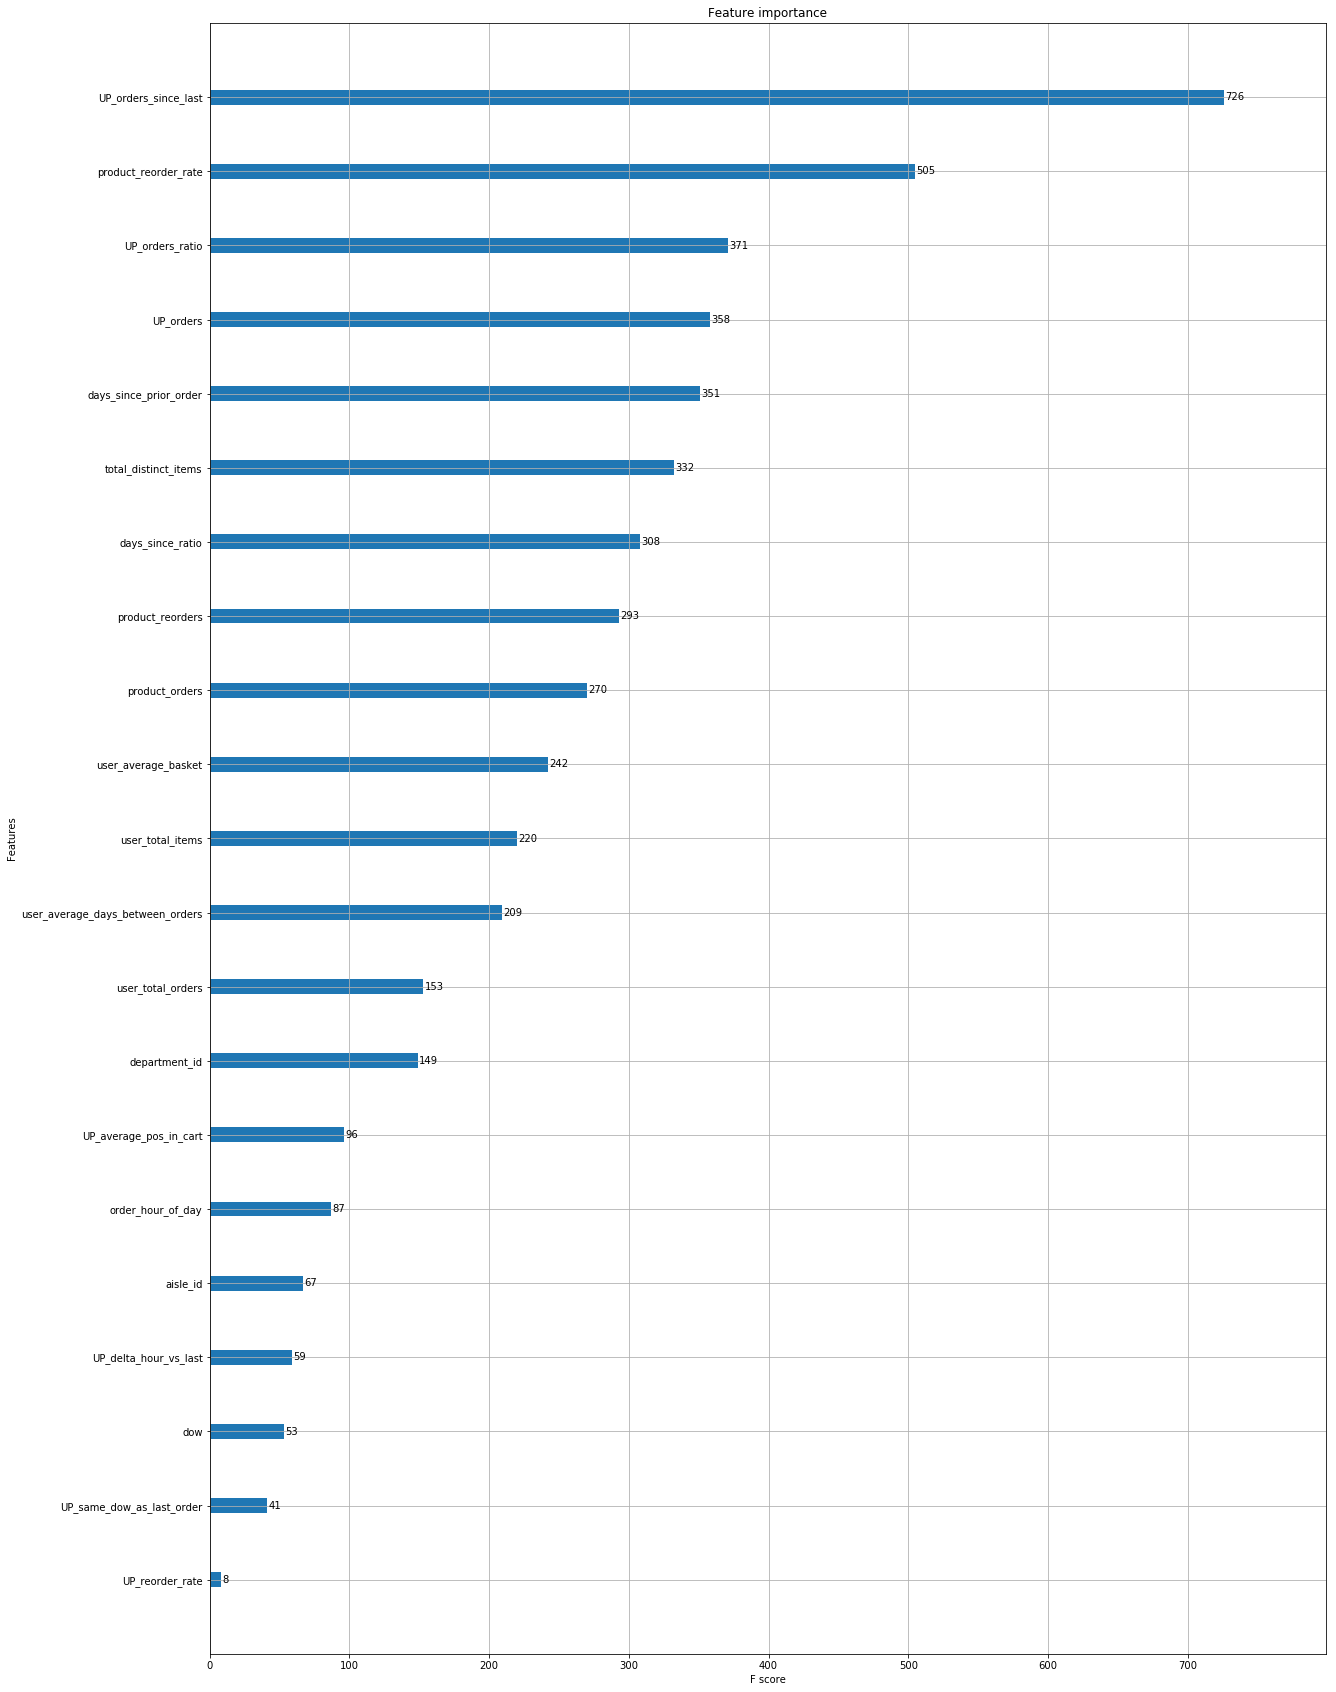

In [35]:
import matplotlib.pyplot as plt
%matplotlib inline
ax = xgboost.plot_importance(bst)
fig = ax.figure
fig.set_size_inches(20, 30)

In [36]:
xgb_pre = bst.predict(xgb_test)

In [57]:
df_test['xgb_pre'] = xgb_pre

In [37]:
import lightgbm as lgb

print('formating for lgb')
d_train = lgb.Dataset(X_train_lgb,
                      label=labels,
                      categorical_feature=['aisle_id', 'department_id'])  # , 'order_hour_of_day', 'dow'

params = {
    'task': 'train',
    'boosting_type': 'gbdt',
    'objective': 'binary',
    'metric': {'binary_logloss'},
    'num_leaves': 96,
    'max_depth': 10,
    'feature_fraction': 0.9,
    'bagging_fraction': 0.95,
    'bagging_freq': 5
}
ROUNDS = 100


formating for lgb


In [38]:
from sklearn.model_selection import cross_val_predict

print('light GBM train :-)')
bst1 = lgb.train(params, d_train, ROUNDS)
# lgb.plot_importance(bst, figsize=(9,20))

# predicted = cross_val_predict(bst, df_train, labels, cv=10)
lgb_pre = bst1.predict(X_test_lgb)

light GBM train :-)


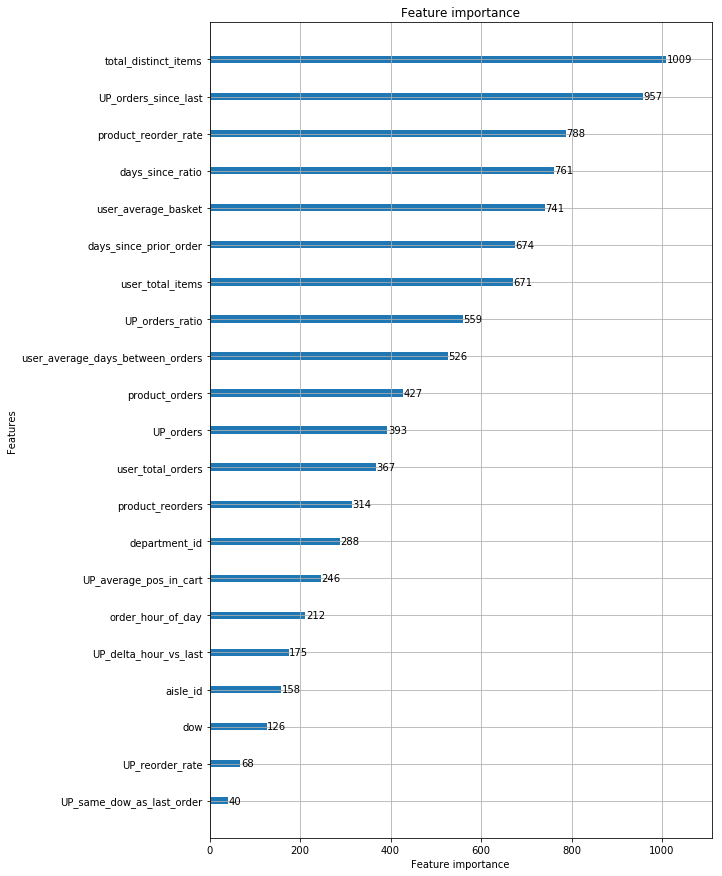

In [39]:
import matplotlib.pyplot as plt
%matplotlib inline


lgb.plot_importance(bst1, figsize=(9,15))

In [40]:
lgb_pre

array([ 0.35861628,  0.06902099,  0.08532799, ...,  0.02354479,
        0.01331254,  0.03914897])

In [98]:
# X_train_xgb = df_train[f_to_use] 
# X_test_xgb = df_test[f_to_use]

In [32]:
# print(X_train.columns)
# print(X_test.columns)

Index(['user_total_orders', 'user_total_items', 'total_distinct_items',
       'user_average_days_between_orders', 'user_average_basket',
       'order_hour_of_day', 'days_since_prior_order', 'days_since_ratio',
       'aisle_id', 'department_id', 'product_orders', 'product_reorders',
       'product_reorder_rate', 'UP_orders', 'UP_orders_ratio',
       'UP_average_pos_in_cart', 'UP_reorder_rate', 'UP_orders_since_last',
       'UP_delta_hour_vs_last'],
      dtype='object')
Index(['user_total_orders', 'user_total_items', 'total_distinct_items',
       'user_average_days_between_orders', 'user_average_basket',
       'order_hour_of_day', 'days_since_prior_order', 'days_since_ratio',
       'aisle_id', 'department_id', 'product_orders', 'product_reorders',
       'product_reorder_rate', 'UP_orders', 'UP_orders_ratio',
       'UP_average_pos_in_cart', 'UP_reorder_rate', 'UP_orders_since_last',
       'UP_delta_hour_vs_last'],
      dtype='object')


In [33]:
# labels

array([0, 1, 1, ..., 0, 0, 0], dtype=int8)

In [38]:
# X_train.isnull().sum()

user_total_orders                    0
user_total_items                     0
total_distinct_items                 0
user_average_days_between_orders     0
user_average_basket                  0
order_hour_of_day                    0
days_since_prior_order               0
days_since_ratio                    47
aisle_id                             0
department_id                        0
product_orders                       0
product_reorders                     0
product_reorder_rate                 0
UP_orders                            0
UP_orders_ratio                      0
UP_average_pos_in_cart               0
UP_reorder_rate                      0
UP_orders_since_last                 0
UP_delta_hour_vs_last                0
dtype: int64

In [39]:
# X_train['days_since_ratio'] = X_train.days_since_ratio.fillna(X_train.days_since_ratio.mean())

E:\Anaconda\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [53]:
df_train.isnull().sum()

order_id                             0
product_id                           0
user_total_orders                    0
user_total_items                     0
total_distinct_items                 0
user_average_days_between_orders     0
user_average_basket                  0
dow                                  0
order_hour_of_day                    0
days_since_prior_order               0
days_since_ratio                    47
aisle_id                             0
department_id                        0
product_orders                       0
product_reorders                     0
product_reorder_rate                 0
UP_orders                            0
UP_orders_ratio                      0
UP_average_pos_in_cart               0
UP_reorder_rate                      0
UP_orders_since_last                 0
UP_delta_hour_vs_last                0
UP_same_dow_as_last_order            0
dtype: int64

In [ ]:
# df_train['days_since_ratio'] = df_train.days_since_ratio.fillna(df_train.days_since_ratio.mean())

In [59]:
# X_train.head()

,user_total_orders,user_total_items,total_distinct_items,user_average_days_between_orders,user_average_basket,order_hour_of_day,days_since_prior_order,days_since_ratio,aisle_id,department_id,product_orders,product_reorders,product_reorder_rate,UP_orders,UP_orders_ratio,UP_average_pos_in_cart,UP_reorder_rate,UP_orders_since_last,UP_delta_hour_vs_last
0,11,59,18,19.0,5.363636,8,14.0,0.736842,24,4,13880,9377.0,0.675576,1,0.090909,6.0,0.090909,6,7
1,11,59,18,19.0,5.363636,8,14.0,0.736842,77,7,35791,27791.0,0.776480,10,0.909091,1.4,0.909091,1,0
2,11,59,18,19.0,5.363636,8,14.0,0.736842,54,17,1214,536.0,0.441516,2,0.181818,5.0,0.181818,7,1
3,11,59,18,19.0,5.363636,8,14.0,0.736842,77,7,8558,6953.0,0.812456,3,0.272727,3.0,0.272727,1,0
4,11,59,18,19.0,5.363636,8,14.0,0.736842,91,16,15935,12923.0,0.810982,1,0.090909,2.0,0.090909,10,0


In [62]:
# train_for_pca = X_train
# test_for_pca = X_test

In [63]:
# import numpy as np
# from sklearn.decomposition import PCA
# from sklearn.preprocessing import StandardScaler
# # X_train_normalized = StandardScaler(with_std=False).fit_transform(X_train)#try changing with_std
# pca = PCA(n_components=10)
# pca.fit(train_for_pca)
# X_train_pca = pca.fit_transform(train_for_pca)

In [64]:
# X_train_pca

array([[ -1.07782574e+04,   3.60660931e+02,  -2.68027794e+02, ...,
         -2.74862176e+00,  -2.47002119e+00,   6.44634946e+00],
       [  1.78356219e+04,   1.00328531e+03,  -2.63070176e+02, ...,
          1.04765355e+00,  -6.13175216e+00,   2.86705367e+00],
       [ -2.61899378e+04,   1.39555667e+03,  -2.70529073e+02, ...,
         -2.76965611e+00,  -2.71716142e+00,  -5.76856298e+00],
       ..., 
       [ -2.34537057e+04,   1.35199552e+03,  -1.91288320e+02, ...,
          1.27457600e+01,  -5.04051036e+00,   8.03520929e+00],
       [ -3.76559590e+03,  -3.86998772e+03,  -1.88456322e+02, ...,
          6.00739272e+00,  -1.86809754e-01,  -6.75089670e+00],
       [ -2.66747958e+04,   1.62702856e+03,  -1.91751076e+02, ...,
          1.01286461e+01,   5.28033160e+00,  -4.08810449e+00]])

In [54]:
df_test.isnull().sum()

order_id                            0
product_id                          0
user_total_orders                   0
user_total_items                    0
total_distinct_items                0
user_average_days_between_orders    0
user_average_basket                 0
dow                                 0
order_hour_of_day                   0
days_since_prior_order              0
days_since_ratio                    0
aisle_id                            0
department_id                       0
product_orders                      0
product_reorders                    0
product_reorder_rate                0
UP_orders                           0
UP_orders_ratio                     0
UP_average_pos_in_cart              0
UP_reorder_rate                     0
UP_orders_since_last                0
UP_delta_hour_vs_last               0
UP_same_dow_as_last_order           0
xgb_pre                             0
lgb_pre                             0
dtype: int64

In [65]:
# # X_test_normalized = StandardScaler(with_std=False).fit_transform(X_test)#try changing with_std
# pca = PCA(n_components=10)
# pca.fit(test_for_pca)
# X_test_pca = pca.fit_transform(test_for_pca)

In [46]:
# X_test_pca 

array([[ -2.50272820e+04,   1.36338840e+03,  -2.41848133e+02,
          3.29891526e+01,  -1.84529194e+01],
       [ -2.56630395e+03,  -2.87109344e+03,  -2.36777182e+02,
          3.10702245e+01,  -1.08376810e+01],
       [ -2.19494622e+04,   3.74585330e+02,  -2.41041752e+02,
          3.24263459e+01,   3.56173024e+01],
       ..., 
       [ -2.58776037e+04,   1.44985991e+03,   3.69806181e+02,
         -3.36088081e+00,   6.93308207e+01],
       [ -2.18306031e+04,  -9.41754402e+02,   3.70959451e+02,
         -3.92799977e+00,   7.17405223e-01],
       [  5.67056697e+04,  -1.03378293e+04,   3.87387653e+02,
         -8.56042184e+00,  -1.32649033e+01]])

In [47]:

# X_train_y_normalized = StandardScaler(with_std=False).fit_transform(labels)#try changing with_std
# pca = PCA(n_components=5)
# pca.fit(X_train_y_normalized)
# X_train_y_pca = pca.fit_transform(X_train_y_normalized)

E:\Anaconda\lib\site-packages\sklearn\utils\validation.py:429: DataConversionWarning: Data with input dtype int8 was converted to float64 by StandardScaler.
  warnings.warn(msg, _DataConversionWarning)
E:\Anaconda\lib\site-packages\sklearn\preprocessing\data.py:586: DeprecationWarning: Passing 1d arrays as data is deprecated in 0.17 and will raise ValueError in 0.19. Reshape your data either using X.reshape(-1, 1) if your data has a single feature or X.reshape(1, -1) if it contains a single sample.
  warnings.warn(DEPRECATION_MSG_1D, DeprecationWarning)
E:\Anaconda\lib\site-packages\sklearn\preprocessing\data.py:649: DeprecationWarning: Passing 1d arrays as data is deprecated in 0.17 and will raise ValueError in 0.19. Reshape your data either using X.reshape(-1, 1) if your data has a single feature or X.reshape(1, -1) if it contains a single sample.
  warnings.warn(DEPRECATION_MSG_1D, DeprecationWarning)
E:\Anaconda\lib\site-packages\sklearn\utils\validation.py:395: DeprecationWarning:

In [26]:
# d_train = xgb.DMatrix(X_train, labels)
# d_test = xgb.DMatrix(X_test)

In [60]:
# df_test['pred'] = pred_com

In [58]:
df_test['lgb_pre'] = lgb_pre

In [59]:
df_test.head()

,order_id,product_id,user_total_orders,user_total_items,total_distinct_items,user_average_days_between_orders,user_average_basket,dow,order_hour_of_day,days_since_prior_order,...,UP_orders_ratio,UP_average_pos_in_cart,UP_reorder_rate,UP_orders_since_last,UP_delta_hour_vs_last,UP_same_dow_as_last_order,rf_pre,probs_clf,xgb_pre,lgb_pre
0,2774568,17668,13,88,33,12.0,6.769231,5,15,11.0,...,0.384615,3.60,0.384615,2,3,False,0.311775,0.303251,0.331503,0.358616
1,2774568,44683,13,88,33,12.0,6.769231,5,15,11.0,...,0.153846,9.50,0.153846,7,1,False,0.048260,0.066754,0.073876,0.069021
2,2774568,48523,13,88,33,12.0,6.769231,5,15,11.0,...,0.153846,6.50,0.153846,4,1,False,0.061262,0.068088,0.091101,0.085328
3,2774568,21903,13,88,33,12.0,6.769231,5,15,11.0,...,0.615385,4.25,0.615385,1,0,False,0.589950,0.696044,0.645617,0.632181
4,2774568,14992,13,88,33,12.0,6.769231,5,15,11.0,...,0.153846,7.00,0.153846,6,0,False,0.096616,0.102889,0.086988,0.082821


In [41]:
X_train_rf = df_train[f_to_use]
X_test_rf = df_test[f_to_use]

In [61]:
print(X_train_rf.columns)
print(X_test_rf.columns)

Index(['user_total_orders', 'user_total_items', 'total_distinct_items',
       'user_average_days_between_orders', 'user_average_basket',
       'order_hour_of_day', 'days_since_prior_order', 'days_since_ratio',
       'aisle_id', 'department_id', 'product_orders', 'product_reorders',
       'product_reorder_rate', 'UP_orders', 'UP_orders_ratio',
       'UP_average_pos_in_cart', 'UP_reorder_rate', 'UP_orders_since_last',
       'UP_delta_hour_vs_last', 'dow', 'UP_same_dow_as_last_order'],
      dtype='object')
Index(['user_total_orders', 'user_total_items', 'total_distinct_items',
       'user_average_days_between_orders', 'user_average_basket',
       'order_hour_of_day', 'days_since_prior_order', 'days_since_ratio',
       'aisle_id', 'department_id', 'product_orders', 'product_reorders',
       'product_reorder_rate', 'UP_orders', 'UP_orders_ratio',
       'UP_average_pos_in_cart', 'UP_reorder_rate', 'UP_orders_since_last',
       'UP_delta_hour_vs_last', 'dow', 'UP_same_dow_as_last

In [42]:
X_train_rf['days_since_ratio'] = X_train_rf.days_since_ratio.fillna(X_train_rf.days_since_ratio.mean())

E:\Anaconda\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [43]:
X_train_rf.isnull().sum()

user_total_orders                   0
user_total_items                    0
total_distinct_items                0
user_average_days_between_orders    0
user_average_basket                 0
order_hour_of_day                   0
days_since_prior_order              0
days_since_ratio                    0
aisle_id                            0
department_id                       0
product_orders                      0
product_reorders                    0
product_reorder_rate                0
UP_orders                           0
UP_orders_ratio                     0
UP_average_pos_in_cart              0
UP_reorder_rate                     0
UP_orders_since_last                0
UP_delta_hour_vs_last               0
dow                                 0
UP_same_dow_as_last_order           0
dtype: int64

In [65]:
X_train_rf.head()

,user_total_orders,user_total_items,total_distinct_items,user_average_days_between_orders,user_average_basket,order_hour_of_day,days_since_prior_order,days_since_ratio,aisle_id,department_id,...,product_reorders,product_reorder_rate,UP_orders,UP_orders_ratio,UP_average_pos_in_cart,UP_reorder_rate,UP_orders_since_last,UP_delta_hour_vs_last,dow,UP_same_dow_as_last_order
0,11,59,18,19.0,5.363636,8,14.0,0.736842,24,4,...,9377.0,0.675576,1,0.090909,6.0,0.090909,6,7,4,True
1,11,59,18,19.0,5.363636,8,14.0,0.736842,77,7,...,27791.0,0.776480,10,0.909091,1.4,0.909091,1,0,4,True
2,11,59,18,19.0,5.363636,8,14.0,0.736842,54,17,...,536.0,0.441516,2,0.181818,5.0,0.181818,7,1,4,True
3,11,59,18,19.0,5.363636,8,14.0,0.736842,77,7,...,6953.0,0.812456,3,0.272727,3.0,0.272727,1,0,4,True
4,11,59,18,19.0,5.363636,8,14.0,0.736842,91,16,...,12923.0,0.810982,1,0.090909,2.0,0.090909,10,0,4,False


In [66]:
X_test_rf.head()

,user_total_orders,user_total_items,total_distinct_items,user_average_days_between_orders,user_average_basket,order_hour_of_day,days_since_prior_order,days_since_ratio,aisle_id,department_id,...,product_reorders,product_reorder_rate,UP_orders,UP_orders_ratio,UP_average_pos_in_cart,UP_reorder_rate,UP_orders_since_last,UP_delta_hour_vs_last,dow,UP_same_dow_as_last_order
0,13,88,33,12.0,6.769231,15,11.0,0.916667,91,16,...,1220.0,0.578199,5,0.384615,3.60,0.384615,2,3,5,False
1,13,88,33,12.0,6.769231,15,11.0,0.916667,83,4,...,11981.0,0.537868,2,0.153846,9.50,0.153846,7,1,5,False
2,13,88,33,12.0,6.769231,15,11.0,0.916667,37,1,...,2376.0,0.463248,2,0.153846,6.50,0.153846,4,1,5,False
3,13,88,33,12.0,6.769231,15,11.0,0.916667,123,4,...,186884.0,0.772500,8,0.615385,4.25,0.615385,1,0,5,False
4,13,88,33,12.0,6.769231,15,11.0,0.916667,83,4,...,16942.0,0.582820,2,0.153846,7.00,0.153846,6,0,5,False


In [67]:
print(labels)

[0 1 1 ..., 0 0 0]


In [44]:
from sklearn.ensemble import RandomForestClassifier

rfr = RandomForestClassifier(n_estimators=100,random_state=123,max_depth = 25,min_samples_leaf = 5)
rfr = rfr.fit(X_train_rf,labels)

rf_pre = rfr.predict(X_test_rf)

In [45]:
import collections
count = collections.Counter(rf_pre)
count.most_common()

[(0, 4709363), (1, 123929)]

In [46]:
print(rf_pre)

[0 0 0 ..., 0 0 0]


In [47]:
probs_rf = rfr.predict_proba(X_test_rf)

In [48]:
probs_rf  = pd.DataFrame(probs_rf)

In [49]:
probs_rf.head()

,0,1
0,0.688225,0.311775
1,0.951740,0.048260
2,0.938738,0.061262
3,0.410050,0.589950
4,0.903384,0.096616


In [50]:
df_test['rf_pre'] = probs_rf[1]

In [51]:
df_test['rf_pre'].head()

0    0.311775
1    0.048260
2    0.061262
3    0.589950
4    0.096616
Name: rf_pre, dtype: float64

In [56]:
df_test.head()

,order_id,product_id,user_total_orders,user_total_items,total_distinct_items,user_average_days_between_orders,user_average_basket,dow,order_hour_of_day,days_since_prior_order,...,product_reorder_rate,UP_orders,UP_orders_ratio,UP_average_pos_in_cart,UP_reorder_rate,UP_orders_since_last,UP_delta_hour_vs_last,UP_same_dow_as_last_order,rf_pre,probs_clf
0,2774568,17668,13,88,33,12.0,6.769231,5,15,11.0,...,0.578199,5,0.384615,3.60,0.384615,2,3,False,0.311775,0.303251
1,2774568,44683,13,88,33,12.0,6.769231,5,15,11.0,...,0.537868,2,0.153846,9.50,0.153846,7,1,False,0.048260,0.066754
2,2774568,48523,13,88,33,12.0,6.769231,5,15,11.0,...,0.463248,2,0.153846,6.50,0.153846,4,1,False,0.061262,0.068088
3,2774568,21903,13,88,33,12.0,6.769231,5,15,11.0,...,0.772500,8,0.615385,4.25,0.615385,1,0,False,0.589950,0.696044
4,2774568,14992,13,88,33,12.0,6.769231,5,15,11.0,...,0.582820,2,0.153846,7.00,0.153846,6,0,False,0.096616,0.102889


In [52]:
from sklearn.tree import DecisionTreeClassifier,export_graphviz
from sklearn import tree

clf = DecisionTreeClassifier(max_depth = 10,min_samples_leaf = 5,random_state=123)
clf = clf.fit(X_train_rf,labels)

clf_pre = clf.predict(X_test_rf)
probs_clf = clf.predict_proba(X_test_rf)

In [53]:
probs_clf = pd.DataFrame(probs_clf)

In [54]:
probs_clf.head()

,0,1
0,0.696749,0.303251
1,0.933246,0.066754
2,0.931912,0.068088
3,0.303956,0.696044
4,0.897111,0.102889


In [55]:
df_test['probs_clf'] = probs_clf[1]

In [61]:
df_test.head()

,order_id,product_id,user_total_orders,user_total_items,total_distinct_items,user_average_days_between_orders,user_average_basket,dow,order_hour_of_day,days_since_prior_order,...,UP_orders_ratio,UP_average_pos_in_cart,UP_reorder_rate,UP_orders_since_last,UP_delta_hour_vs_last,UP_same_dow_as_last_order,rf_pre,probs_clf,xgb_pre,lgb_pre
0,2774568,17668,13,88,33,12.0,6.769231,5,15,11.0,...,0.384615,3.60,0.384615,2,3,False,0.311775,0.303251,0.331503,0.358616
1,2774568,44683,13,88,33,12.0,6.769231,5,15,11.0,...,0.153846,9.50,0.153846,7,1,False,0.048260,0.066754,0.073876,0.069021
2,2774568,48523,13,88,33,12.0,6.769231,5,15,11.0,...,0.153846,6.50,0.153846,4,1,False,0.061262,0.068088,0.091101,0.085328
3,2774568,21903,13,88,33,12.0,6.769231,5,15,11.0,...,0.615385,4.25,0.615385,1,0,False,0.589950,0.696044,0.645617,0.632181
4,2774568,14992,13,88,33,12.0,6.769231,5,15,11.0,...,0.153846,7.00,0.153846,6,0,False,0.096616,0.102889,0.086988,0.082821


In [91]:
df_train['xgb_pre'] = df_test['xgb_pre']
df_train['lgb_pre'] = df_test['lgb_pre']
df_train['rf_pre'] = df_test['rf_pre']
df_train['probs_clf'] = df_test['probs_clf']

In [92]:
p_to_use = ['xgb_pre','lgb_pre','rf_pre','probs_clf']

In [100]:
second_data = df_train[p_to_use]

In [101]:
second_data.head()

,xgb_pre,lgb_pre,rf_pre,probs_clf
0,0.340983,0.346369,0.311775,0.303251
1,0.071231,0.062158,0.048260,0.066754
2,0.086759,0.087638,0.061262,0.068088
3,0.639897,0.612771,0.589950,0.696044
4,0.086550,0.077162,0.096616,0.102889


In [80]:
pre_com = df_test['xgb_pre'] * 0.35 + df_test['lgb_pre'] * 0.35 + df_test['rf_pre'] * 0.20 + df_test['probs_clf'] * 0.1

In [75]:
pre_com

0          0.330467
1          0.064947
2          0.078457
3          0.635233
4          0.090530
5          0.060199
6          0.192134
7          0.165212
8          0.036586
9          0.746381
10         0.706933
11         0.047686
12         0.100082
13         0.036047
14         0.154220
15         0.298552
16         0.020622
17         0.126781
18         0.026416
19         0.322138
20         0.046653
21         0.040214
22         0.023176
23         0.062500
24         0.081436
25         0.032669
26         0.031614
27         0.066683
28         0.341097
29         0.270157
             ...   
4833262    0.017696
4833263    0.035325
4833264    0.740445
4833265    0.181998
4833266    0.208261
4833267    0.244416
4833268    0.022644
4833269    0.015743
4833270    0.016922
4833271    0.171542
4833272    0.017348
4833273    0.004410
4833274    0.011291
4833275    0.009366
4833276    0.008458
4833277    0.007409
4833278    0.009854
4833279    0.005072
4833280    0.024458


In [ ]:
# pre_com = df_train['xgb_pre'] * 0.4 + lgb_pre * 0.3 + rf_pre * 0.15 + probs_clf * 0.15

In [102]:
from sklearn.model_selection import train_test_split

y = labels
x = second_data

x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.25,random_state=123)

In [123]:
y_test.mean()

0.097693548676384107

In [106]:
print('formating for lgb')
d_train_1 = lgb.Dataset(x_train,
                      label=y_train,
                      categorical_feature=['aisle_id', 'department_id'])  # , 'order_hour_of_day', 'dow'

formating for lgb


In [107]:
from sklearn.model_selection import cross_val_predict

print('light GBM train :-)')
second_bst1 = lgb.train(params, d_train_1, ROUNDS)
# lgb.plot_importance(bst, figsize=(9,20))

# predicted = cross_val_predict(bst, df_train, labels, cv=10)
lgb_pre = second_bst1.predict(x_test)

light GBM train :-)


In [108]:
lgb_pre

array([ 0.09589368,  0.09799161,  0.09799161, ...,  0.09799161,
        0.09799161,  0.09813348])

In [110]:
lgb_pre = pd.DataFrame(lgb_pre)

In [116]:
import numpy as np
np.mean(lgb_pre) 

0    0.097872
dtype: float64

In [122]:
from collections import Counter
data = Counter(lgb_pre)
data.most_common()

[(0, 1)]

In [81]:
df_test['pred'] = pre_com

In [82]:

TRESHOLD = 0.2205  # guess, should be tuned with crossval on a subset of train data

d = dict()
for row in df_test.itertuples():
    if row.pred > TRESHOLD:
        try:
            d[row.order_id] += ' ' + str(row.product_id)
        except:
            d[row.order_id] = str(row.product_id)

for order in test_orders.order_id:
    if order not in d:
        d[order] = 'None'

sub = pd.DataFrame.from_dict(d, orient='index')

sub.reset_index(inplace=True)
sub.columns = ['order_id', 'products']
sub.to_csv('sub_28.csv', index=False)